In [1]:
try:
    # install for jupyterlite if needed
    import piplite
    print('installing piplite packages... This may take up to ~5 minutes. If still running, please try refreshing the page.')
    await piplite.install(['mathpad', 'nbformat>=5.6', 'ipywidgets>=7,<8'])
    print('piplite packages installed and ready to go!')
    in_jupyterlite = True

except (ImportError, SyntaxError):
    # not running in jupyterlite
    in_jupyterlite = False


<div style="display: flex; height: 300px;">

![cart spring pendulum diagram](imgs/cart_spring_pendulum.png)

&nbsp;

![cart spring pendulum simulation](imgs/cart_spring_pendulum_simulation.gif)
</div>

Let $x$ be the distance in the x direction from equilibrium position for body $m_1$

In [2]:
# Variable definitions
from mathpad import *

x = "x(t)" * m
m1 = "m1" * kg

theta = "theta(t)" * radians
m2 = "m2" * kg

k = "k" * N / m
l = "l" * m

F = "F(t)" * N
g = "g" * meter / s**2

O = R2("O") # Origin

In [3]:
print("Position of m1")
r_1 = O[x, 0]
r_1

Position of m1


O[x(t), 0]

In [4]:
print("Position of m2")
# convert theta to anticlockwise wrt +x axis
theta_wrt_xplus = pi/2 - theta

r_2 = r_1 + O.from_polar(l, theta_wrt_xplus)
r_2

Position of m2


O[l*sin(theta(t)) + x(t), l*cos(theta(t))]

In [5]:
print("Velocity of m2 wrt origin")

v_2 = diff(r_2)
v_2

Velocity of m2 wrt origin


O[l*cos(theta(t))*Derivative(theta(t), t) + Derivative(x(t), t), -l*sin(theta(t))*Derivative(theta(t), t)]

In [6]:
from mathpad.mech import kinetic_energy, elastic_energy, euler_lagrange, gravitational_energy

print("Kinetic Energy")
T = kinetic_energy(m1, diff(x)) + kinetic_energy(m2, abs(v_2))
T

Kinetic Energy


0.5*mDerivative(x(t), t)**2 + 0.5*m2*(l**2*Derivative(theta(t), t)**2 + 2*l*cos(theta(t))*Derivative(theta(t), t)*Derivative(x(t), t) + Derivative(x(t), t)**2) kilogram*meters**2/second**2

In [7]:
print("Potential Energy")
V = elastic_energy(k, x) + gravitational_energy(m2, r_2.j, g)
V

Potential Energy


g*l*m2*cos(theta(t)) + 0.5*k*x(t)**2 meter*newtons

In [8]:
print("Dynamics of Body 1")
x_dynamics = euler_lagrange(T, V, F, x)
x_dynamics

Dynamics of Body 1


F(t) = k*x(t) + mDerivative(x(t), (t, 2)) + m2*(-l*sin(theta(t))*Derivative(theta(t), t)**2 + l*cos(theta(t))*Derivative(theta(t), (t, 2)) + Derivative(x(t), (t, 2))) newton

In [9]:
print("Dynamics of Body 2")
theta_dynamics = euler_lagrange(T, V, 0, theta)
theta_dynamics

Dynamics of Body 2


l*m2*(-g*sin(theta(t)) + l*Derivative(theta(t), (t, 2)) + cos(theta(t))*Derivative(x(t), (t, 2))) = 0 kilogram*meter**2/(radian*second**2)

In [10]:
# simulate with these substitutions:

simulation_subs = {
    k: 100,
    m1: 10,
    m2: 1,
    l: 0.5,
    g: 9.81,
    # A small perturbation
    F: piecewise(t, [
        # t < 1s: 1 N
        (1, 1 * N),
        # t >= 1s: 0 N
        (float('inf'), 0 * N)
    ])
}

Solving subbed Equations...
Solving finished.
Simulating from t=0 to t=20 with a max_step of 0.01.


  0%|          | 0/20 [00:00<?, ?it/s]

Simulation finished. Plotting...


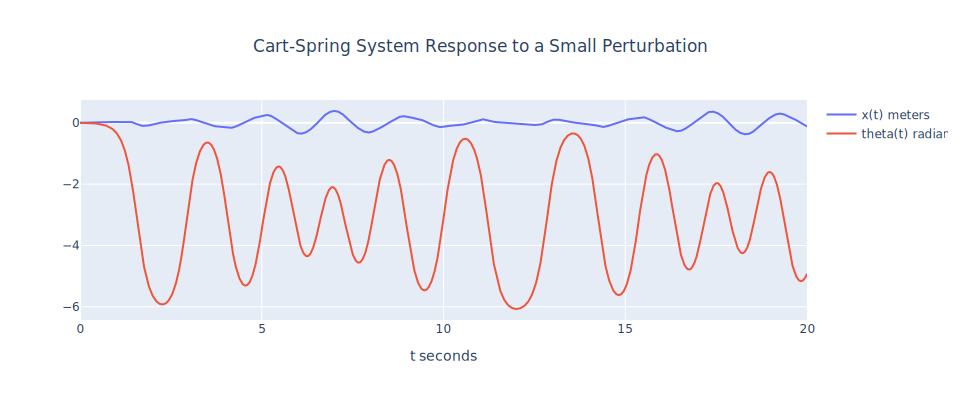

In [11]:
sim_data = simulate_dynamic_system(
    [x_dynamics, theta_dynamics],
    plot_title="Cart-Spring System Response to a Small Perturbation",
    x_f=20, max_step=0.01,
    substitute=simulation_subs,
    initial_conditions={
        x: 0,
        diff(x): 0,
        theta: 0,
        diff(theta): 0
    },
    record=[x, theta],
    plot_static=not in_jupyterlite
)